In [31]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
seed=  3
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
df_txt = np.loadtxt('./data/ThoraricSurgery.csv',  delimiter=',')
df_txt

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [9]:
df = pd.read_csv('./data/ThoraricSurgery.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [11]:
df.iloc[:,:17]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58


In [14]:
df[[17]].value_counts()

17
0     400
1      70
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =  train_test_split(
    df.iloc[:,:17], df[17], stratify=df[17], random_state=seed, test_size=0.2
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((376, 17), (94, 17), (376,), (94,))

In [25]:
del model

In [26]:
model = Sequential([
    Dense(32, input_dim=17, activation='relu'),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                576       
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 16)                1040      
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [28]:
model_path = 'best_surgery.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbos=1, monitor='val_loss')
es = EarlyStopping(patience=20)

In [29]:
hist1 = model.fit(X_train, y_train, validation_split=0.2,
                epochs=100, batch_size=32, verbose=1,
                callbacks = [mc, es])

Epoch 1/100
10/10 [==============================] - 1s 43ms/step - loss: 1.8453 - accuracy: 0.8533 - val_loss: 0.7550 - val_accuracy: 0.8421
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6144 - accuracy: 0.7333 - val_loss: 0.4773 - val_accuracy: 0.8421
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5245 - accuracy: 0.8533 - val_loss: 0.4547 - val_accuracy: 0.8421
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4331 - accuracy: 0.8533 - val_loss: 0.4359 - val_accuracy: 0.8421
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4244 - accuracy: 0.8533 - val_loss: 0.4364 - val_accuracy: 0.8421
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4255 - accuracy: 0.8533 - val_loss: 0.4585 - val_accuracy: 0.8421
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4134 - accuracy: 0.8533 - val_loss: 0.4429 - val_accuracy: 0.8421
Epoch 

In [30]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.4344 - accuracy: 0.8511


[0.4344356656074524, 0.8510638475418091]

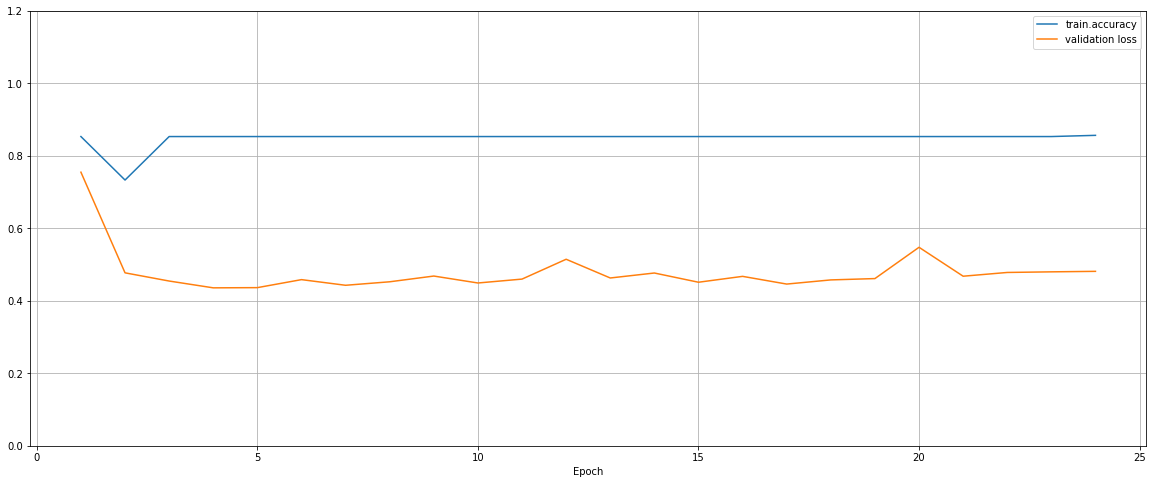

In [33]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()